In [2]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata

AnnData object with n_obs × n_vars = 47244 × 6770
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_counts', 'leiden_0.9', 'cell_type', 'category', 'category_response'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'genome-0-1', 'genome-1-1', 'genome-2-1', 'genome-3-1', 'genome-4-1', 'genome-5-1', 'genome-6-1', 'genome-7-1', 'genome-8-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [3]:
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()
print(adata)
adata = adata[adata.obs['leiden_0.9'].isin(['3', '6', '10', '11', '12', '13'])].copy()
adata

AnnData object with n_obs × n_vars = 19660 × 6770
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_counts', 'leiden_0.9', 'cell_type', 'category', 'category_response'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'genome-0-1', 'genome-1-1', 'genome-2-1', 'genome-3-1', 'genome-4-1', 'genome-5-1', 'genome-6-1', 'genome-7-1', 'genome-8-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'


AnnData object with n_obs × n_vars = 13733 × 6770
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_counts', 'leiden_0.9', 'cell_type', 'category', 'category_response'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'genome-0-1', 'genome-1-1', 'genome-2-1', 'genome-3-1', 'genome-4-1', 'genome-5-1', 'genome-6-1', 'genome-7-1', 'genome-8-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [4]:
adata.obs['response'].value_counts()

response
NR    8472
CR    5261
Name: count, dtype: int64

In [5]:
sc.tl.rank_genes_groups(adata, 'response', method='wilcoxon', reference='CR', corr_method='bonferroni')

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:
res = sc.get.rank_genes_groups_df(adata, None)
res = res[res['names'].isin(adata.var_names)]
res.sort_values('pvals_adj', ascending=False)
res

,names,scores,logfoldchanges,pvals,pvals_adj
0,JUND,75.524048,6.207779,0.0,0.0
1,KLF2,70.022392,9.125793,0.0,0.0
2,TGFB1,66.146919,5.357286,0.0,0.0
4,CD81,60.198776,3.483536,0.0,0.0
5,MKNK2,56.844379,3.152460,0.0,0.0
...,...,...,...,...,...
24866,MT-ND1,-40.900417,-7.735886,0.0,0.0
24867,HLA-DRB5,-41.122818,-3.965965,0.0,0.0
24872,MT-ND5,-46.634083,-10.717929,0.0,0.0
24874,MTRNR2L12,-52.107807,-32.626381,0.0,0.0


In [7]:
sigs = res[(res['pvals_adj'] < 0.05) & (abs(res['logfoldchanges']) > 0.5)]
sigs.shape

(1160, 5)

In [8]:
min_padj = 1e-300
sigs.loc[sigs['pvals_adj'] == 0, 'pvals_adj'] = min_padj
sigs['sorter'] = -np.log10(sigs['pvals_adj']) * sigs['logfoldchanges']
sigs = sigs.sort_values('sorter', ascending=False)
sigs.set_index('names', inplace=True)
sigs.rename(columns={'pvals_adj': 'padj'}, inplace=True)
sigs.rename(columns={'logfoldchanges': 'log2FoldChange'}, inplace=True)
sigs

/tmp/ipykernel_967631/1015809924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['sorter'] = -np.log10(sigs['pvals_adj']) * sigs['logfoldchanges']


,scores,log2FoldChange,pvals,padj,sorter
names,,,,,
S100A9,29.377335,33.628044,1.069862e-189,2.661709e-185,6206.890847
S100A8,30.717739,24.097902,3.299124e-207,8.207891e-203,4869.843103
KLF2,70.022392,9.125793,0.000000e+00,1.000000e-300,2737.738037
PTPRCAP,49.701313,8.620308,0.000000e+00,1.000000e-300,2586.092377
JUND,75.524048,6.207779,0.000000e+00,1.000000e-300,1862.333679
...,...,...,...,...,...
HSP90AA1,-34.553928,-5.707070,1.244301e-261,3.095697e-257,-1463.916287
PCBP2,-52.602482,-6.157826,0.000000e+00,1.000000e-300,-1847.347784
MT-ND1,-40.900417,-7.735886,0.000000e+00,1.000000e-300,-2320.765829


In [11]:
!pip install sanbomics

In [12]:
from sanbomics.plots import volcano

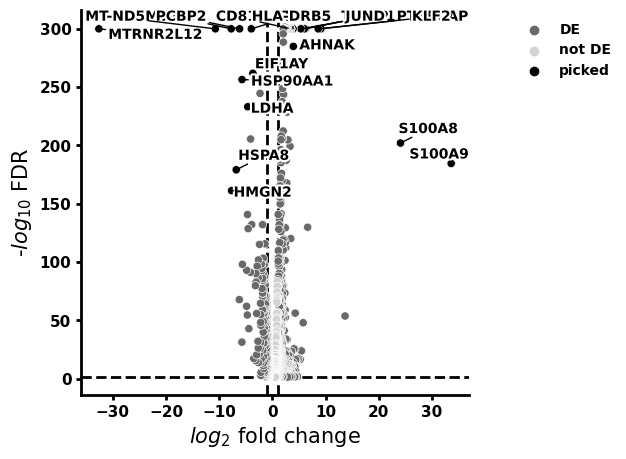

In [13]:
sigs['symbol'] = sigs.index
volcano(sigs, to_label = 10, baseMean=None, log2fc_thresh = 1, save = True)

In [94]:
import scanpy as sc
import pandas as pd
import numpy as np

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()
adata = adata[adata.obs['leiden_0.9'].isin(['3', '6', '10', '11', '12', '13'])].copy()
adata = adata[(adata.obs['response'] == 'CR') | (adata.obs['response'] == 'NR')].copy()

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, 'response', method='wilcoxon', corr_method='bonferroni')

# Extract the differential expression results
res = sc.get.rank_genes_groups_df(adata, 'NR')
res = res[res['names'].isin(adata.var_names)]
sigs = res[(res.pvals_adj < 0.05) & (abs(res.logfoldchanges) > 0.5)]

# Handle cases where adjusted p-values are zero
min_padj = 1e-300
sigs['pvals_adj'] = sigs['pvals_adj'].replace(0, min_padj)
sigs['nlog10'] = -np.log10(sigs['pvals_adj'])
sigs['sorter'] = sigs['logfoldchanges'] * sigs['nlog10']

top_markers = sigs.sort_values('sorter', ascending=False)
top_markers['response'] = 'NR'  # Maintain the cluster label as string for consistency

top_markers.to_csv('/home/emma/result/CART/CD3E_CD4_high_confidence_clusters_CART_response_diff_result_last.csv', index=False)
print('File has been saved.')


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


File has been saved.


/tmp/ipykernel_90578/652754792.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['pvals_adj'] = sigs['pvals_adj'].replace(0, min_padj)
/tmp/ipykernel_90578/652754792.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['nlog10'] = -np.log10(sigs['pvals_adj'])
/tmp/ipykernel_90578/652754792.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Index(['Ingenuity Canonical Pathways', ' -log(p-value)', 'Ratio', 'z-score',
       'Molecules'],
      dtype='object')


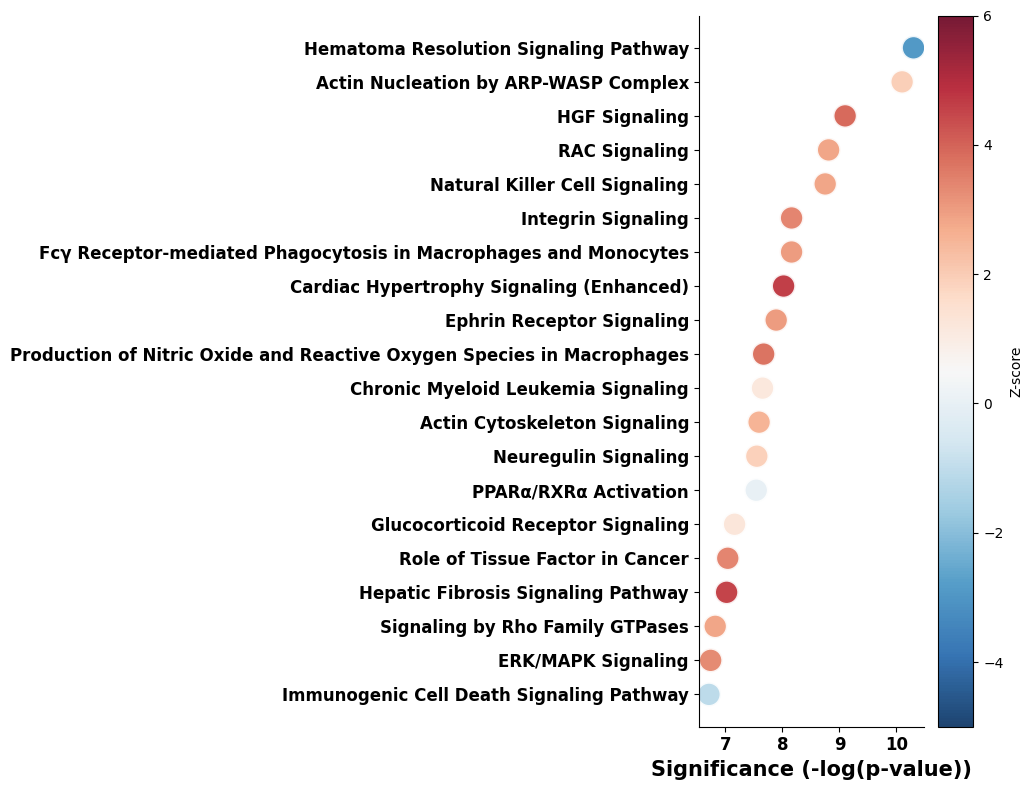

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

df = pd.read_excel('/home/emma/result/CART/pathways/IPA_CD4_last.xls')
print(df.columns)

df.rename(columns={' -log(p-value)': 'Significance', 'z-score': 'Z_score', 'Ingenuity Canonical Pathways': 'Pathway'}, inplace=True)

# Sort the data by Significance and select the top 20 pathways
df.sort_values('Significance', ascending=False, inplace=True)
top_paths = df.head(20)
top_paths = top_paths.sort_values('Significance', ascending=True)

# Creating the bubble plot with a fixed size for bubbles
plt.figure(figsize=(10, 8))
scatter = plt.scatter(top_paths['Significance'], top_paths['Pathway'], s=300,  # Fixed bubble size
                      c=top_paths['Z_score'], cmap='RdBu_r', alpha=0.9, edgecolors="w", linewidth=2,
                      vmin=-5, vmax=6)
plt.colorbar(scatter, label='Z-score')
plt.xlabel('Significance (-log(p-value))', fontsize=15, fontweight='bold')
plt.ylabel('')
plt.title('', fontsize=18, fontweight='bold')


ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create a FontProperties object to specify tick label properties
font_props = FontProperties(weight='bold', size=12)
# Set the font properties for tick labels on both axes
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_props)

plt.tight_layout()
plt.show()


In [3]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata

AnnData object with n_obs × n_vars = 47244 × 6770
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_counts', 'leiden_0.9', 'cell_type', 'category', 'category_response'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'genome-0-1', 'genome-1-1', 'genome-2-1', 'genome-3-1', 'genome-4-1', 'genome-5-1', 'genome-6-1', 'genome-7-1', 'genome-8-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [4]:
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()
adata = adata[adata.obs['leiden_0.9'].isin(['0', '1', '4', '7', '9', '10', '11', '13', '14'])].copy()
adata

AnnData object with n_obs × n_vars = 24975 × 6770
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_counts', 'leiden_0.9', 'cell_type', 'category', 'category_response'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'genome-0-1', 'genome-1-1', 'genome-2-1', 'genome-3-1', 'genome-4-1', 'genome-5-1', 'genome-6-1', 'genome-7-1', 'genome-8-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [5]:
adata.obs['response'].value_counts()

response
NR    15473
CR     9502
Name: count, dtype: int64

In [6]:
sc.tl.rank_genes_groups(adata, 'response', method='wilcoxon', reference='CR', corr_method='bonferroni')

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [7]:
res = sc.get.rank_genes_groups_df(adata, None)
res = res[res['names'].isin(adata.var_names)]
res.sort_values('pvals_adj', ascending=False)
res

,names,scores,logfoldchanges,pvals,pvals_adj
0,JUND,83.899925,4.083096,0.000000e+00,0.000000e+00
1,TGFB1,83.051132,5.013091,0.000000e+00,0.000000e+00
3,KLF2,76.080055,5.938804,0.000000e+00,0.000000e+00
4,GNAS,71.444145,3.833734,0.000000e+00,0.000000e+00
6,UBALD2,65.940193,3.175279,0.000000e+00,0.000000e+00
...,...,...,...,...,...
24872,HLA-DPA1,-35.242798,-1.632559,4.423219e-272,1.100453e-267
24873,HLA-DPB1,-35.919182,-1.614098,1.533137e-282,3.814291e-278
24875,HLA-DRB1,-37.834835,-1.896823,0.000000e+00,0.000000e+00
24876,FGFBP2,-38.098190,-3.285752,0.000000e+00,0.000000e+00


In [8]:
sigs = res[(res['pvals_adj'] < 0.05) & (abs(res['logfoldchanges']) > 0.5)]
sigs.shape

(2058, 5)

In [14]:
min_padj = 1e-300
sigs.loc[sigs['pvals_adj'] == 0, 'pvals_adj'] = min_padj
sigs['sorter'] = -np.log10(sigs['pvals_adj']) * sigs['logfoldchanges']
sigs = sigs.sort_values('sorter', ascending=False)
sigs.set_index('names', inplace=True)
sigs.rename(columns={'pvals_adj': 'padj'}, inplace=True)
sigs.rename(columns={'logfoldchanges': 'log2FoldChange'}, inplace=True)
sigs

/tmp/ipykernel_967768/1015809924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['sorter'] = -np.log10(sigs['pvals_adj']) * sigs['logfoldchanges']


,scores,log2FoldChange,pvals,padj,nlog10,sorter,symbol
names,,,,,,,
S100A8,44.615616,21.826412,0.000000e+00,1.000000e-300,300.000000,6547.923660,70
S100A9,45.574375,20.250105,0.000000e+00,1.000000e-300,300.000000,6075.031471,65
TLE5,58.973545,5.992370,0.000000e+00,1.000000e-300,300.000000,1797.710896,18
KLF2,76.080055,5.938804,0.000000e+00,1.000000e-300,300.000000,1781.641245,3
TGFB1,83.051132,5.013091,0.000000e+00,1.000000e-300,300.000000,1503.927183,1
...,...,...,...,...,...,...,...
HLA-DPB1,-35.919182,-1.614098,1.533137e-282,3.814291e-278,277.418586,-447.780871,24873
GZMH,-26.968208,-3.195777,3.489163e-160,8.680688e-156,155.061446,-495.541793,24869
HLA-DRB1,-37.834835,-1.896823,0.000000e+00,1.000000e-300,300.000000,-569.046950,24875


In [10]:
import scanpy as sc
import pandas as pd
import numpy as np

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()
adata = adata[adata.obs['leiden_0.9'].isin(['0', '1', '4', '7', '9', '10', '11', '13', '14'])].copy()
adata = adata[(adata.obs['response'] == 'CR') | (adata.obs['response'] == 'NR')].copy()

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, 'response', method='wilcoxon', corr_method='bonferroni')

# Extract the differential expression results
res = sc.get.rank_genes_groups_df(adata, 'NR')
res = res[res['names'].isin(adata.var_names)]
sigs = res[(res.pvals_adj < 0.05) & (abs(res.logfoldchanges) > 0.5)]

# Handle cases where adjusted p-values are zero
min_padj = 1e-300
sigs['pvals_adj'] = sigs['pvals_adj'].replace(0, min_padj)
sigs['nlog10'] = -np.log10(sigs['pvals_adj'])
sigs['sorter'] = sigs['logfoldchanges'] * sigs['nlog10']

top_markers = sigs.sort_values('sorter', ascending=False)
top_markers['response'] = 'NR' 

# Save the top genes per category to a CSV file
top_markers.to_csv('/home/emma/result/CART/CD3E_CD8_high_confidence_clusters_CART_response_diff_result_last.csv', index=False)
print('File has been saved.')

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


File has been saved.


/tmp/ipykernel_967768/3164412458.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['pvals_adj'] = sigs['pvals_adj'].replace(0, min_padj)
/tmp/ipykernel_967768/3164412458.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['nlog10'] = -np.log10(sigs['pvals_adj'])
/tmp/ipykernel_967768/3164412458.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

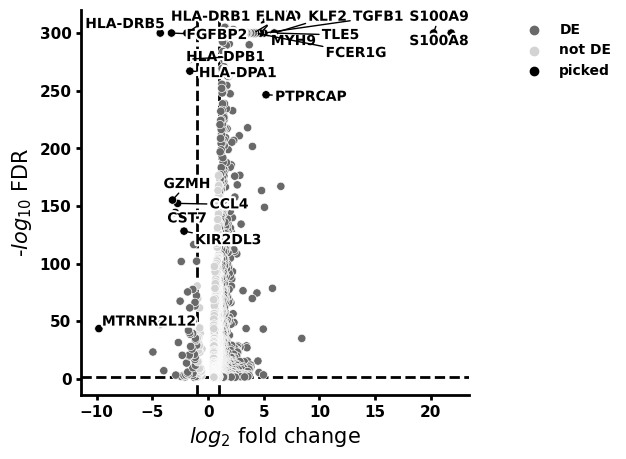

In [15]:
sigs['symbol'] = sigs.index
volcano(sigs, to_label = 10, baseMean=None, log2fc_thresh = 1, save = True)

Index(['Ingenuity Canonical Pathways', ' -log(p-value)', 'Ratio', 'z-score',
       'Molecules'],
      dtype='object')


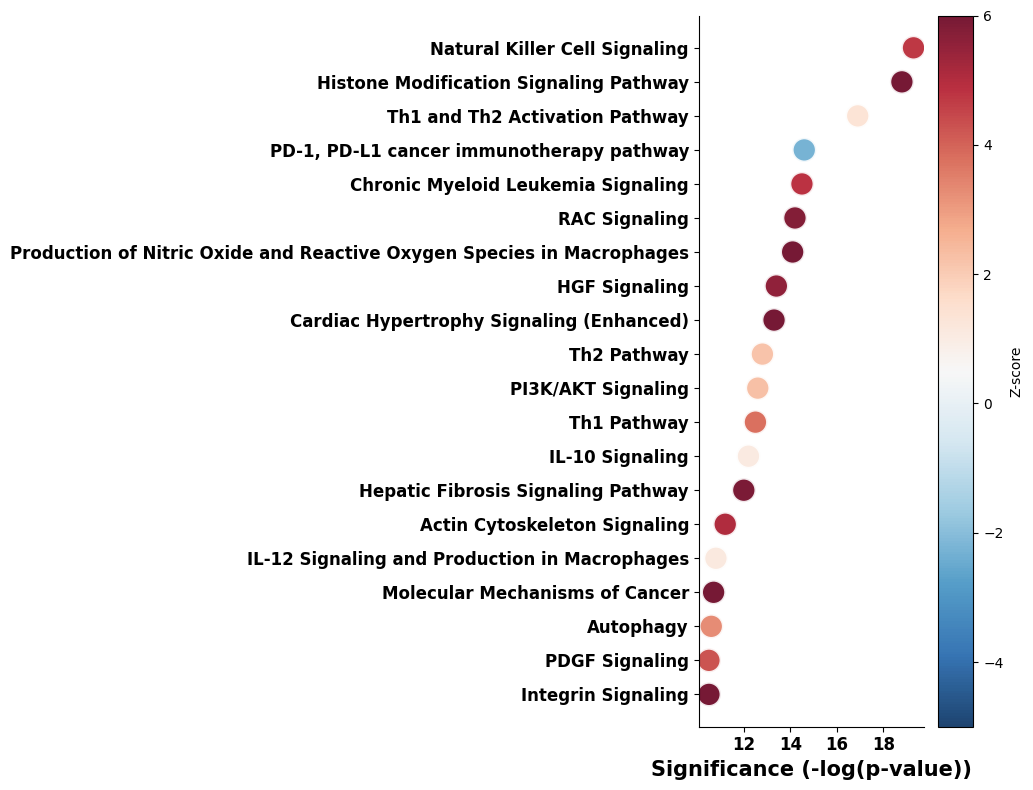

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

df = pd.read_excel('/home/emma/result/CART/pathways/IPA_CD8_last.xls')
print(df.columns)
df.rename(columns={' -log(p-value)': 'Significance', 'z-score': 'Z_score', 'Ingenuity Canonical Pathways': 'Pathway'}, inplace=True)

# Sort the data by Significance and select the top 20 pathways
df.sort_values('Significance', ascending=False, inplace=True)
top_paths = df.head(20)
top_paths = top_paths.sort_values('Significance', ascending=True)

# Creating the bubble plot with a fixed size for bubbles
plt.figure(figsize=(10, 8))
scatter = plt.scatter(top_paths['Significance'], top_paths['Pathway'], s=300,  # Fixed bubble size
                      c=top_paths['Z_score'], cmap='RdBu_r', alpha=0.9, edgecolors="w", linewidth=2,
                      vmin=-5, vmax=6)
plt.colorbar(scatter, label='Z-score')
plt.xlabel('Significance (-log(p-value))', fontsize=15, fontweight='bold')
plt.ylabel('')
plt.title('', fontsize=18, fontweight='bold')

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a FontProperties object to specify tick label properties
font_props = FontProperties(weight='bold', size=12)
# Set the font properties for tick labels on both axes
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_props)

plt.tight_layout()
plt.show()
